In [8]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By 
import requests
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

In [17]:
# Visit the website
# https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html
import time

# Get the ChromeDriverManager service
service = webdriver.chrome.service.Service(ChromeDriverManager().install())
service.start()

# Set up the Chrome browser using the Service object
browser = webdriver.Chrome(service=service)

# Navigate to the Mars Temperature Data Site
url = "https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html"
browser.get(url)

# Wait for the page to load (optional)
time.sleep(2)  # You can use explicit waits or adjust the sleep time as needed

# Get the page source after JavaScript execution
page_source = browser.page_source

# Close the browser
browser.quit()

# Parse the HTML content with BeautifulSoup
soup = BeautifulSoup(page_source, "html.parser")

# Find and extract the Mars weather data elements
weather_data = soup.find_all("div", class_="mars_weather")

# Extract the weather data text
mars_weather = weather_data[0].text.strip() if len(weather_data) > 0 else "N/A"

# Print the Mars weather data
print("Mars Weather Data:")
print(mars_weather)


Mars Weather Data:
N/A


In [20]:
# Create a Beautiful Soup Object.
url = "https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html"

# Send a request to the website and get the HTML content
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Parse the HTML content with BeautifulSoup
    soup = BeautifulSoup(response.content, "html.parser")

    # Now you can use the 'soup' object to extract data from the website
    # For example, to find all the links on the page:
    all_links = soup.find_all("a")
    for link in all_links:
        print(link['href'])  # Print the href attribute of each link
else:
    print(f"Failed to fetch the page. Status Code: {response.status_code}")


/


In [21]:
# Extract all rows of data
# target
url = "https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html"

# Request to the website and get the HTML content
response = requests.get(url)


if response.status_code == 200:
    # Parse the HTML content with BeautifulSoup
    soup = BeautifulSoup(response.content, "html.parser")

    # Find the table element by its tag and class name
    table = soup.find("table", class_="table")

    # Create lists for table data
    headings = []
    data_rows = []

    # Extract table headings (column names)
    for th in table.find_all("th"):
        headings.append(th.text.strip())

    # Extract the table data (rows and cells)
    for tr in table.find_all("tr"):
        row_data = []
        for td in tr.find_all("td"):
            row_data.append(td.text.strip())
        if row_data:  # Skip empty rows
            data_rows.append(row_data)

    # Convert the table into a list of dictionaries
    table_data = []
    for row in data_rows:
        table_data.append(dict(zip(headings, row)))

    # Print table data
    for row in table_data:
        print(row)
else:
    print(f"Failed to fetch the page. Status Code: {response.status_code}")


{'id': '2', 'terrestrial_date': '2012-08-16', 'sol': '10', 'ls': '155', 'month': '6', 'min_temp': '-75.0', 'pressure': '739.0'}
{'id': '13', 'terrestrial_date': '2012-08-17', 'sol': '11', 'ls': '156', 'month': '6', 'min_temp': '-76.0', 'pressure': '740.0'}
{'id': '24', 'terrestrial_date': '2012-08-18', 'sol': '12', 'ls': '156', 'month': '6', 'min_temp': '-76.0', 'pressure': '741.0'}
{'id': '35', 'terrestrial_date': '2012-08-19', 'sol': '13', 'ls': '157', 'month': '6', 'min_temp': '-74.0', 'pressure': '732.0'}
{'id': '46', 'terrestrial_date': '2012-08-20', 'sol': '14', 'ls': '157', 'month': '6', 'min_temp': '-74.0', 'pressure': '740.0'}
{'id': '57', 'terrestrial_date': '2012-08-21', 'sol': '15', 'ls': '158', 'month': '6', 'min_temp': '-78.0', 'pressure': '740.0'}
{'id': '68', 'terrestrial_date': '2012-08-22', 'sol': '16', 'ls': '158', 'month': '6', 'min_temp': '-77.0', 'pressure': '740.0'}
{'id': '79', 'terrestrial_date': '2012-08-23', 'sol': '17', 'ls': '159', 'month': '6', 'min_temp':

In [22]:
# Website
url = "https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html"

# Request the HTML content
response = requests.get(url)

if response.status_code == 200:
    # Parse the HTML content with BeautifulSoup
    soup = BeautifulSoup(response.content, "html.parser")

    # Find table element by its tag and class name
    table = soup.find("table", class_="table")

    # Create lists for table data
    headings = []
    data_rows = []

    # Extract table headings/columns
    for th in table.find_all("th"):
        headings.append(th.text.strip())

    # Extract table data [rows]
    for tr in table.find_all("tr"):
        row_data = []
        for td in tr.find_all("td"):
            row_data.append(td.text.strip())
        if row_data:  # Skip empty rows
            data_rows.append(row_data)

    # Convert table data into dictionaries
    table_data = []
    for row in data_rows:
        table_data.append(dict(zip(headings, row)))

    # Create a Pandas Df
    df = pd.DataFrame(table_data)

    # Print the DataFrame
    print(df)
else:
    print(f"Failed to fetch the page. Status Code: {response.status_code}")


        id terrestrial_date   sol   ls month min_temp pressure
0        2       2012-08-16    10  155     6    -75.0    739.0
1       13       2012-08-17    11  156     6    -76.0    740.0
2       24       2012-08-18    12  156     6    -76.0    741.0
3       35       2012-08-19    13  157     6    -74.0    732.0
4       46       2012-08-20    14  157     6    -74.0    740.0
...    ...              ...   ...  ...   ...      ...      ...
1862  1889       2018-02-23  1973  133     5    -78.0    730.0
1863  1892       2018-02-24  1974  134     5    -77.0    729.0
1864  1894       2018-02-25  1975  134     5    -76.0    729.0
1865  1893       2018-02-26  1976  135     5    -77.0    728.0
1866  1895       2018-02-27  1977  135     5    -77.0    727.0

[1867 rows x 7 columns]


In [25]:
# webaddress
url = "https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html"

# Send a request for the HTML content
response = requests.get(url)

if response.status_code == 200:
    # Parse the HTML content with BeautifulSoup
    soup = BeautifulSoup(response.content, "html.parser")

    # Find the table 
    table = soup.find("table", class_="table")

    # Create an empty list 
    rows = []

    # Extract the table data 
    for tr in table.find_all("tr"):
        row_data = {}
        for i, td in enumerate(tr.find_all("td")):
            row_data[headings[i]] = td.text.strip()
        if row_data:  # Skip empty rows
            rows.append(row_data)

    # Create a Pandas DF
    df = pd.DataFrame(rows)

    # Print the DataFrame
    print(df)
else:
    print(f"Failed to fetch the page. Status Code: {response.status_code}")


        id terrestrial_date   sol   ls month min_temp pressure
0        2       2012-08-16    10  155     6    -75.0    739.0
1       13       2012-08-17    11  156     6    -76.0    740.0
2       24       2012-08-18    12  156     6    -76.0    741.0
3       35       2012-08-19    13  157     6    -74.0    732.0
4       46       2012-08-20    14  157     6    -74.0    740.0
...    ...              ...   ...  ...   ...      ...      ...
1862  1889       2018-02-23  1973  133     5    -78.0    730.0
1863  1892       2018-02-24  1974  134     5    -77.0    729.0
1864  1894       2018-02-25  1975  134     5    -76.0    729.0
1865  1893       2018-02-26  1976  135     5    -77.0    728.0
1866  1895       2018-02-27  1977  135     5    -77.0    727.0

[1867 rows x 7 columns]


In [26]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names

# URL 
url = "https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html"

# Request HTML content
response = requests.get(url)

# Check request.
if response.status_code == 200:
    # Parse the HTML content using BeautifulSoup.
    soup = BeautifulSoup(response.content, "html.parser")

    # Find the table element using tag and class name
    table = soup.find("table", class_="table")

    # Create an empty list to store the rows of data
    rows = []

    # Extract the table data (rows and cells)
    for tr in table.find_all("tr"):
        row_data = [td.text.strip() for td in tr.find_all("td")]
        if row_data:  # Skip empty rows
            rows.append(row_data)

    # Create a list of column names (headings)
    headings = [th.text.strip() for th in table.find_all("th")]

    # Create a Pandas DataFrame using the list of rows and column names
    df = pd.DataFrame(rows, columns=headings)

    # Print the DataFrame
    print(df)
else:
    print(f"Failed to fetch the page. Status Code: {response.status_code}")


        id terrestrial_date   sol   ls month min_temp pressure
0        2       2012-08-16    10  155     6    -75.0    739.0
1       13       2012-08-17    11  156     6    -76.0    740.0
2       24       2012-08-18    12  156     6    -76.0    741.0
3       35       2012-08-19    13  157     6    -74.0    732.0
4       46       2012-08-20    14  157     6    -74.0    740.0
...    ...              ...   ...  ...   ...      ...      ...
1862  1889       2018-02-23  1973  133     5    -78.0    730.0
1863  1892       2018-02-24  1974  134     5    -77.0    729.0
1864  1894       2018-02-25  1975  134     5    -76.0    729.0
1865  1893       2018-02-26  1976  135     5    -77.0    728.0
1866  1895       2018-02-27  1977  135     5    -77.0    727.0

[1867 rows x 7 columns]


In [13]:
# Confirm DataFrame was created successfully


,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


In [30]:
# URL of website
url = "https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html"

# Send a request to the website and get the HTML content
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Parse the HTML content with BeautifulSoup
    soup = BeautifulSoup(response.content, "html.parser")

    # Find the table element by its tag and class name
    table = soup.find("table", class_="table")

    # Create an empty list to store the rows of data
    rows = []

    # Extract the table data (rows and cells)
    for tr in table.find_all("tr"):
        row_data = [td.text.strip() for td in tr.find_all("td")]
        if row_data:  # Skip empty rows
            rows.append(row_data)

    # Create a list of column names (headings)
    headings = [th.text.strip() for th in table.find_all("th")]

    # Create a Pandas DataFrame using the list of rows and column names
    df = pd.DataFrame(rows, columns=headings)

    # Convert columns to appropriate data types
    df["terrestrial_date"] = pd.to_datetime(df["terrestrial_date"])
    df["sol"] = df["sol"].astype(int)
    df["ls"] = df["ls"].astype(float)
    df["month"] = df["month"].astype(int)
    df["min_temp"] = df["min_temp"].astype(float)
    df["pressure"] = df["pressure"].astype(float)

    # Print the DataFrame with updated data types
    print(df.dtypes)

    
    print(df.describe())
    
else:
    print(f"Failed to fetch the page. Status Code: {response.status_code}")


id                          object
terrestrial_date    datetime64[ns]
sol                          int32
ls                         float64
month                        int32
min_temp                   float64
pressure                   float64
dtype: object
               sol           ls        month     min_temp     pressure
count  1867.000000  1867.000000  1867.000000  1867.000000  1867.000000
mean   1015.670059   168.865024     6.141939   -76.121050   841.066417
std     565.342298   105.599153     3.506493     5.504098    54.253226
min      10.000000     0.000000     1.000000   -90.000000   727.000000
25%     546.500000    78.000000     3.000000   -80.000000   800.000000
50%    1028.000000   160.000000     6.000000   -76.000000   853.000000
75%    1505.500000   257.500000     9.000000   -72.000000   883.000000
max    1977.000000   359.000000    12.000000   -62.000000   925.000000


In [34]:
# Get data type for each column.
url = "https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html"

response = requests.get(url)
if response.status_code == 200:
    # Parse the HTML content with BeautifulSoup
    soup = BeautifulSoup(response.content, "html.parser")

    table = soup.find("table", class_="table")

    rows = []

    for tr in table.find_all("tr"):
        row_data = [td.text.strip() for td in tr.find_all("td")]
        if row_data:  # Skip empty rows
            rows.append(row_data)
            
    headings = [th.text.strip() for th in table.find_all("th")]
    df = pd.DataFrame(rows, columns=headings)

    # Print the data type of each column
    print(df.dtypes)
else:
    print(f"Failed to fetch the page. Status Code: {response.status_code}")


id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object


In [35]:
# Change data types for data analysis


url = "https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html"

response = requests.get(url)
if response.status_code == 200:
    
    soup = BeautifulSoup(response.content, "html.parser")

    table = soup.find("table", class_="table")

    rows = []

    for tr in table.find_all("tr"):
        row_data = [td.text.strip() for td in tr.find_all("td")]
        if row_data:  # Skip empty rows
            rows.append(row_data)

    headings = [th.text.strip() for th in table.find_all("th")]

    df = pd.DataFrame(rows, columns=headings)

    # Change data types.
    df["terrestrial_date"] = pd.to_datetime(df["terrestrial_date"])
    df["sol"] = df["sol"].astype(int)
    df["ls"] = df["ls"].astype(float)
    df["month"] = df["month"].astype(int)
    df["min_temp"] = df["min_temp"].astype(float)
    df["pressure"] = df["pressure"].astype(float)

   
    print(df.describe())

    print(f"Failed to fetch the page. Status Code: {response.status_code}")


               sol           ls        month     min_temp     pressure
count  1867.000000  1867.000000  1867.000000  1867.000000  1867.000000
mean   1015.670059   168.865024     6.141939   -76.121050   841.066417
std     565.342298   105.599153     3.506493     5.504098    54.253226
min      10.000000     0.000000     1.000000   -90.000000   727.000000
25%     546.500000    78.000000     3.000000   -80.000000   800.000000
50%    1028.000000   160.000000     6.000000   -76.000000   853.000000
75%    1505.500000   257.500000     9.000000   -72.000000   883.000000
max    1977.000000   359.000000    12.000000   -62.000000   925.000000
Failed to fetch the page. Status Code: 200


In [36]:
# Confirm type changes were successful by examining data types again
print(df.describe())

               sol           ls        month     min_temp     pressure
count  1867.000000  1867.000000  1867.000000  1867.000000  1867.000000
mean   1015.670059   168.865024     6.141939   -76.121050   841.066417
std     565.342298   105.599153     3.506493     5.504098    54.253226
min      10.000000     0.000000     1.000000   -90.000000   727.000000
25%     546.500000    78.000000     3.000000   -80.000000   800.000000
50%    1028.000000   160.000000     6.000000   -76.000000   853.000000
75%    1505.500000   257.500000     9.000000   -72.000000   883.000000
max    1977.000000   359.000000    12.000000   -62.000000   925.000000


AxesSubplot(0.125,0.11;0.775x0.77)


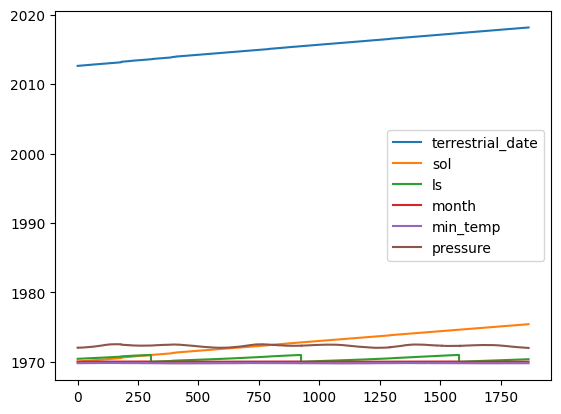

In [37]:
print(df.plot())

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [38]:
# 1. How many months are there on Mars?
num_martian_months = df["month"].nunique()
print("Number of months on Mars:", num_martian_months)


Number of months on Mars: 12


In [39]:
# 2. How many Martian days' worth of data are there?
num_martian_days = df["sol"].nunique()
print("Number of Martian days worth of data:", num_martian_days)


Number of Martian days worth of data: 1867


<AxesSubplot:title={'center':'Average Low Temperature by Month on Mars'}, xlabel='Month', ylabel='Average Low Temperature (Celsius)'>

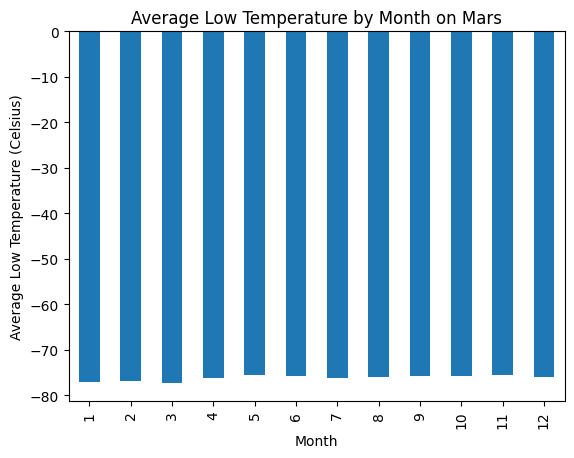

In [46]:
# 3. What is the average low temperature by month?
# Convert 'terrestrial_date' to datetime and extract the month
df["terrestrial_date"] = pd.to_datetime(df["terrestrial_date"])
df["month"] = df["terrestrial_date"].dt.month

# Calculate the average minimum temperature for each month
avg_min_temp_by_month = df.groupby("month")["min_temp"].mean()

# Plot the results as a bar chart
avg_min_temp_by_month.plot(kind="bar", xlabel="Month", ylabel="Average Low Temperature (Celsius)", title="Average Low Temperature by Month on Mars")


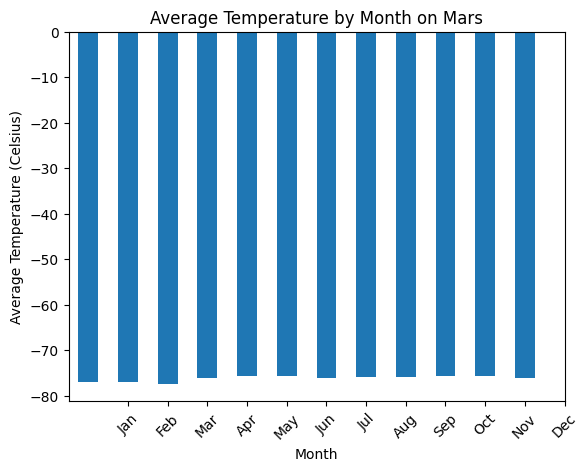

In [45]:
# Plot the average temperature by month
import matplotlib.pyplot as plt

url = "https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html"

response = requests.get(url)


if response.status_code == 200:
    # Parse the HTML content with BeautifulSoup
    soup = BeautifulSoup(response.content, "html.parser")

    table = soup.find("table", class_="table")
    rows = []

    for tr in table.find_all("tr"):
        row_data = [td.text.strip() for td in tr.find_all("td")]
        if row_data:  # Skip empty rows
            rows.append(row_data)
    headings = [th.text.strip() for th in table.find_all("th")]
    df = pd.DataFrame(rows, columns=headings)

    # Convert 'terrestrial_date' to datetime and extract the month
    df["terrestrial_date"] = pd.to_datetime(df["terrestrial_date"])
    df["month"] = df["terrestrial_date"].dt.month

    # Convert 'min_temp' to float
    df["min_temp"] = df["min_temp"].astype(float)

    # Calculate the average minimum temperature for each month
    avg_temp_by_month = df.groupby("month")["min_temp"].mean()

    # Plot the results as a bar chart
    avg_temp_by_month.plot(kind="bar", xlabel="Month", ylabel="Average Temperature (Celsius)", title="Average Temperature by Month on Mars")
    plt.xticks(range(1, 13), ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"], rotation=45)
    plt.show()
else:
    print(f"Failed to fetch the page. Status Code: {response.status_code}")


In [53]:
# Identify the coldest and hottest months in Curiosity's location
#Data source
url = "https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html"

response = requests.get(url)
if response.status_code == 200:
    
    soup = BeautifulSoup(response.content, "html.parser")                             
    table = soup.find("table", class_="table")
    rows = []
    for tr in table.find_all("tr"):
        row_data = [td.text.strip() for td in tr.find_all("td")]
        if row_data:  # Skip empty rows
            rows.append(row_data)

    headings = [th.text.strip() for th in table.find_all("th")]
    df = pd.DataFrame(rows, columns=headings)
    df["terrestrial_date"] = pd.to_datetime(df["terrestrial_date"])
    df["month"] = df["terrestrial_date"].dt.month
    df["min_temp"] = df["min_temp"].astype(float)
    avg_min_temp_by_month = df.groupby("month")["min_temp"].mean()
    coldest_month = avg_min_temp_by_month.idxmin()
    hottest_month = avg_min_temp_by_month.idxmax()

    # Print results
    print("Coldest Month:", coldest_month)
    print("Hottest Month:", hottest_month)
else:
    print(f"Failed to fetch the page. Status Code: {response.status_code}")


Coldest Month: 3
Hottest Month: 11


In [54]:
# 4. Average pressure by Martian month

url = "https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html"

response = requests.get(url)


if response.status_code == 200:
    # Parse the HTML content with BeautifulSoup
    soup = BeautifulSoup(response.content, "html.parser")

    # Find the table element by its tag and class name
    table = soup.find("table", class_="table")

    # Create an empty list to store the rows of data
    rows = []

    # Extract the table data (rows and cells)
    for tr in table.find_all("tr"):
        row_data = [td.text.strip() for td in tr.find_all("td")]
        if row_data:  # Skip empty rows
            rows.append(row_data)

    # Create a list of column names (headings)
    headings = [th.text.strip() for th in table.find_all("th")]

    # Create a Pandas df using the list of rows and column names
    df = pd.DataFrame(rows, columns=headings)

    # Convert 'terrestrial_date' to datetime and extract the month
    df["terrestrial_date"] = pd.to_datetime(df["terrestrial_date"])
    df["month"] = df["terrestrial_date"].dt.month

    # Convert 'pressure' to float
    df["pressure"] = df["pressure"].astype(float)

    # Calculate the average atmospheric pressure for each Martian month
    avg_pressure_by_month = df.groupby("month")["pressure"].mean()

    # Print the results
    print("Average Atmospheric Pressure by Martian Month:")
    print(avg_pressure_by_month)
else:
    print(f"Failed to fetch the page. Status Code: {response.status_code}")


Average Atmospheric Pressure by Martian Month:
month
1     861.258621
2     837.967532
3     827.722222
4     817.676056
5     803.601399
6     807.910959
7     822.510638
8     829.606452
9     845.586207
10    865.475138
11    875.481013
12    875.260116
Name: pressure, dtype: float64


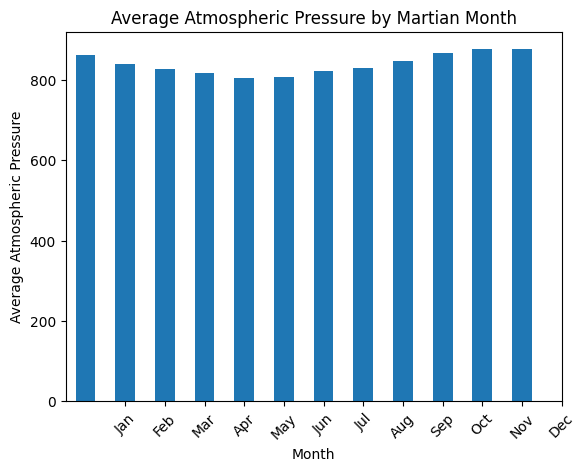

In [55]:
# Plot the average pressure by month

# URL of the website
url = "https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html"

# Send a request to the website and get the HTML content
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Parse the HTML content with BeautifulSoup
    soup = BeautifulSoup(response.content, "html.parser")

    # Find the table element by tag and class name
    table = soup.find("table", class_="table")

    # Create an empty list to store the rows of data
    rows = []

    # Extract the table info.
    for tr in table.find_all("tr"):
        row_data = [td.text.strip() for td in tr.find_all("td")]
        if row_data:  # Skip empty rows
            rows.append(row_data)

    # Create a list of column name/headings.
    headings = [th.text.strip() for th in table.find_all("th")]

    # Create a Pandas DataFrame using the list of rows and column names
    df = pd.DataFrame(rows, columns=headings)

    # Convert 'terrestrial_date' to datetime and extract the month
    df["terrestrial_date"] = pd.to_datetime(df["terrestrial_date"])
    df["month"] = df["terrestrial_date"].dt.month

    # Convert 'pressure' to float
    df["pressure"] = df["pressure"].astype(float)

    # Calculate the average atmospheric pressure for each Martian month
    avg_pressure_by_month = df.groupby("month")["pressure"].mean()

    # Plot the results as a bar chart
    avg_pressure_by_month.plot(kind="bar", xlabel="Month", ylabel="Average Atmospheric Pressure", title="Average Atmospheric Pressure by Martian Month")
    plt.xticks(range(1, 13), ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"], rotation=45)
    plt.show()
else:
    print(f"Failed to fetch the page. Status Code: {response.status_code}")


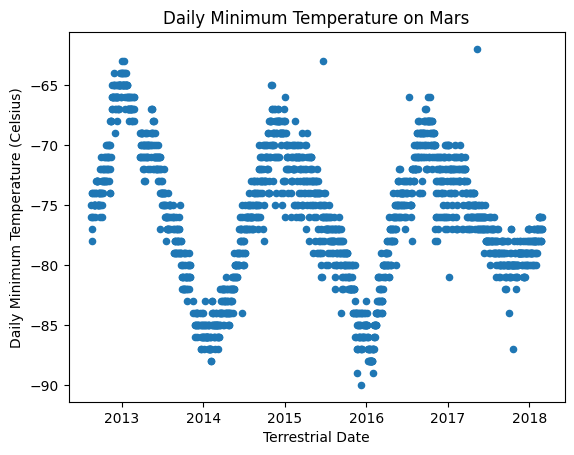

Number of Terrestrial (Earth) Days in a Martian Year: 1867


In [56]:
# 5. How many terrestrial (earth) days are there in a Martian year?

url = "https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html"
response = requests.get(url)

# Check request.
if response.status_code == 200:
    # Parse with BeautifulSoup
    soup = BeautifulSoup(response.content, "html.parser")

    # Find the table element
    table = soup.find("table", class_="table")

    # Create an empty list.
    rows = []

    # Extract the table data.
    for tr in table.find_all("tr"):
        row_data = [td.text.strip() for td in tr.find_all("td")]
        if row_data:  # Skip empty rows
            rows.append(row_data)

    # List by column name.
    headings = [th.text.strip() for th in table.find_all("th")]

    # Create a Pandas DataFrame by rows and column names
    df = pd.DataFrame(rows, columns=headings)

    # Convert 'terrestrial_date' to datetime and extract the month
    df["terrestrial_date"] = pd.to_datetime(df["terrestrial_date"])
    df["month"] = df["terrestrial_date"].dt.month

    # Convert 'min_temp' to float
    df["min_temp"] = df["min_temp"].astype(float)

    # Plot the daily minimum temperature as a scatter chart
    df.plot(x="terrestrial_date", y="min_temp", kind="scatter", xlabel="Terrestrial Date", ylabel="Daily Minimum Temperature (Celsius)", title="Daily Minimum Temperature on Mars")
    plt.show()

    # Calculate the number of Earth days in a Martian year
    earth_days_in_martian_year = len(df["terrestrial_date"].unique())

    # Print the result
    print("Number of Terrestrial (Earth) Days in a Martian Year:", earth_days_in_martian_year)
else:
    print(f"Failed to fetch the page. Status Code: {response.status_code}")


On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

In [58]:
# Write the data to a CSV

# Source of data.
url = "https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html"

# Get data.
response = requests.get(url)

# Check request.
if response.status_code == 200:
    # Parse the HTML content with BeautifulSoup
    soup = BeautifulSoup(response.content, "html.parser")

    # Find the table element.
    table = soup.find("table", class_="table")

    # Create the empty list.
    rows = []

    # Get the table data.
    for tr in table.find_all("tr"):
        row_data = [td.text.strip() for td in tr.find_all("td")]
        if row_data:  # Skip empty rows
            rows.append(row_data)

    # Create a list of column names.
    headings = [th.text.strip() for th in table.find_all("th")]

    # Create a Pandas df with rows and columns.
    df = pd.DataFrame(rows, columns=headings)

    # Convert 'terrestrial_date' to datetime and extract the month
    df["terrestrial_date"] = pd.to_datetime(df["terrestrial_date"])
    df["month"] = df["terrestrial_date"].dt.month

    # Convert 'min_temp' to float
    df["min_temp"] = df["min_temp"].astype(float)

    # Export the DataFrame to a CSV file
    df.to_csv("mars_weather_data.csv", index=False)

    print("Data has been saved to 'mars_weather_data.csv'")
else:
    print(f"Failed to fetch the page. Status Code: {response.status_code}")


Data has been saved to 'mars_weather_data.csv'


In [ ]:
browser.quit()